In [ ]:
import numpy as np
import matplotlib.pyplot as plt




In [ ]:

outfile = "drive/MyDrive/15k toloka/prediction_3.npz" 

x = np.load(outfile)["arr_0"]
y = np.load(outfile)["arr_1"]
z = np.load(outfile)["arr_2"]
m = x[0]


# Generator functions

In [ ]:
str_len,num_symb = 5,12

inp = np.random.rand(str_len,num_symb)


def gen(matr, size = 1):
    l = []
    for symb in matr:
        norm = np.linalg.norm(symb, ord = 1)
        a = np.random.choice(a= num_symb, size = size, p = symb / norm )
        l.append(a)
    return np.array(l).T


gen(inp, 3)



array([[ 0,  5,  7,  7,  4],
       [ 6,  1, 10,  1, 10],
       [ 6,  6,  1,  5,  0]])

In [ ]:


def decoder(vh, break_sym = 11):
    ans = []
    prev_sym = break_sym
    for sym in vh:
        if sym == break_sym:
            prev_sym = break_sym
            continue
        elif sym == prev_sym:
            continue
        else:
            prev_sym = sym
            ans.append(sym)
    return ans

# Decoder testing
example = [ 2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  6,  6,  6, 11, 11, 11, 11, 11, 11, 11,  5]
assert decoder(example) == [2,6,5]


In [ ]:
from collections import Counter
import json

def interpeter(s):
    generated = gen(matr = s, size = 2000)
    preds = [str(decoder(word)) for word in generated]
    return Counter(preds).most_common(1)


example = json.loads(interpeter(x[1])[0][0])

def to_string(arr):
    ans = ""
    for k in arr:
        ans += str(k-1)
    return ans

assert to_string(example) == "3493"


# gen(matr = m, size = 20)

In [ ]:
z

array(['154', '3493', '1645', ..., '2382', '163', '300'], dtype='<U4')

# 

In [ ]:
import pandas as pd
errs = []
conf = []
i = 0
log = pd.DataFrame(columns = ["pred", "ans", "confidence", "is_wrong"])
for s,ans in list(zip(x,z)):
    hehe  = interpeter(s)[0]
    hehe0 = hehe[1]
    hehe1 = json.loads(hehe[0])
    hehe2 = to_string(hehe1)
    conf.append(hehe0)
    if hehe2 != ans:
        # print("ПРЕДСКАЗАНИЕ ",hehe2, "ТРУ ", ans,"УВЕРЕННОСТЬ", hehe0, i)
        errs.append(1)
    else:
        errs.append(0)
    i = i + 1
    # print([hehe2,ans,hehe0,errs[-1]])
    log = log.append({"pred":hehe2,"ans":ans,"confidence":hehe0,"is_wrong":errs[-1]}, ignore_index = True)

log



,pred,ans,confidence,is_wrong
0,154,154,2000,0
1,3493,3493,2000,0
2,1645,1645,1999,0
3,1472,1472,2000,0
4,277,277,2000,0
...,...,...,...,...
1195,348,348,1852,0
1196,313,313,2000,0
1197,2382,2382,1999,0
1198,163,163,2000,0


# Threshold dependencies plot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


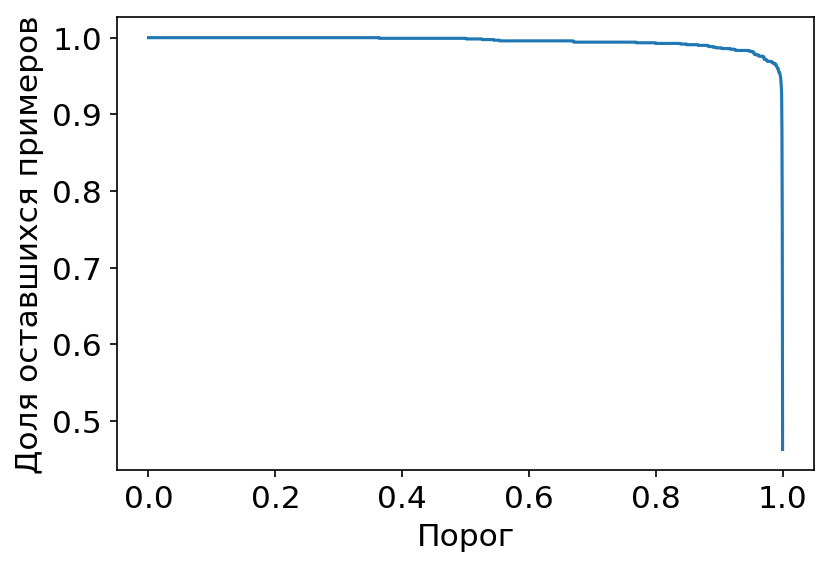

In [ ]:
delta = 2000
x = range(2000 - delta, 2000)
dat = [log[log.confidence > i].is_wrong.count()/1200 for i in x]


font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 15}
matplotlib.rc('font', **font)



fig, ax = plt.subplots()
ax.set_xlabel('Порог')
ax.set_ylabel('Доля оставшихся примеров')

fig.dpi = 150
fig.figsize = (12, 8)


plt.plot(np.array(x)/2000, dat)
plt.show()

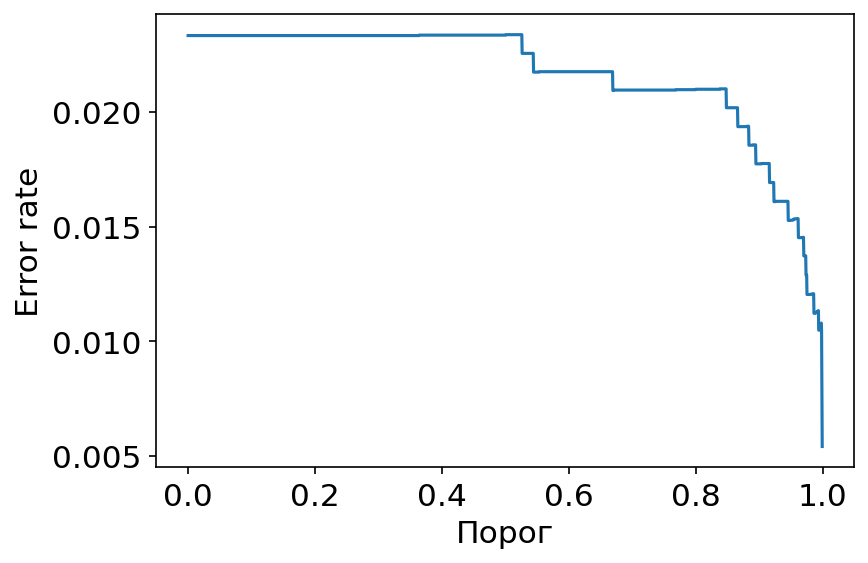

In [ ]:

delta = 2000
x = range(2000 - delta, 2000)
dat = [log[log.confidence > i].is_wrong.mean() for i in x]


font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 15}
matplotlib.rc('font', **font)


fig, ax = plt.subplots()
ax.set_xlabel('Порог')
ax.set_ylabel('Error rate')

fig.dpi = 150
fig.figsize = (6, 4)


plt.plot(np.array(x)/2000, dat)
plt.show()

# Uncertain examples

In [ ]:
log[log.confidence == 1733]

,pred,ans,confidence,is_wrong
411,1446,1646,1733,1


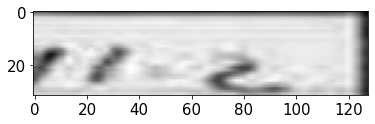

In [ ]:
plt.imshow(y[48][:,:,0], cmap='gray',)
plt.show()
#confidence == 1990

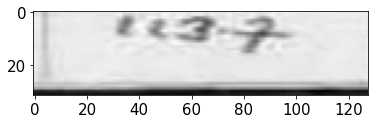

In [ ]:
plt.imshow(y[222][:,:,0], cmap='gray',)
plt.show()
#confidence == 1950

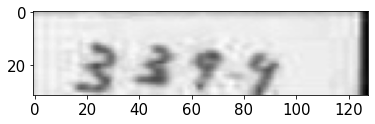

In [ ]:
plt.imshow(y[821][:,:,0], cmap='gray',)
plt.show()
#confidence == 1053

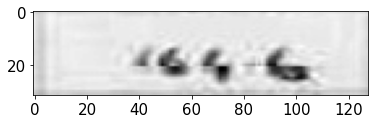

In [ ]:
plt.imshow(y[411][:,:,0], cmap='gray',)
plt.show()
#confidence == 1733